# Customizing your Workbench with Pip

You can use the package installer for Python (`pip`) to install Python packages.
With `pip`, you can customize your workbench, by installing libraries (or different versions of those libraries) that are initially not included in the workbench.

> **NOTE**
>
> The use of the `Conda` package manager is also common in the data science ecosystem.
> The default notebook images shipped with RHODS do not include `conda`.
> If you require `conda` in your environments, you can [enable the Anaconda Professional Edition SaaS-based service in RHODS](https://access.redhat.com/documentation/es-es/red_hat_openshift_data_science/1/html-single/getting_started_with_red_hat_openshift_data_science/index#enabling-services_get-started).
 

To run pip in a workbench, you have three options:

* Open a terminal from the Launcher and run the `pip` command as usual.
* In a notebook file, use the `!` prefix.
* In a notebook file, use the `%` prefix.

## The `!` prefix

The `!` prefix allows you to run a shell command in a code cell.
For example:

In [1]:
!pwd

/opt/app-root/src/rhods-qc-apps/1.intro/chapter3/customize


When you use the `!` prefix, Juypter lab launches the given command in a separate process.

## The `%` Prefix

By using the `%` prefix, you can run _magic commands_, which are special Juypter/IPython commands.
There are several commands available, such as `%pip`, `%alias`, or `%env`.
For a complete list, see https://ipython.readthedocs.io/en/stable/interactive/magics.html

> **⚠️ WARNING**
>
> Although you can run `pip` by using either prefix, using `%pip` is generally the recommended option.
> The `%` prefix ensures that the packages are installed in the current kernel.
> Depending on your workbench, using `!pip` might install the dependencies on a different Python environment, if the `pip` command is not associated with the kernel that runs the notebook.

## Listing Installed Packages

List the installed packages in this workbench by using the `pip list` command:

In [2]:
%pip list

Package                         Version
------------------------------- -----------
absl-py                         1.4.0
aiohttp                         3.8.5
aiosignal                       1.3.1
ansiwrap                        0.8.4
anyio                           3.7.1
argon2-cffi                     23.1.0
argon2-cffi-bindings            21.2.0
arrow                           1.2.3
astroid                         2.15.6
asttokens                       2.2.1
async-timeout                   4.0.3
attrs                           23.1.0
autopep8                        2.0.2
Babel                           2.12.1
backcall                        0.2.0
beautifulsoup4                  4.12.2
black                           23.7.0
bleach                          6.0.0
bokeh                           3.2.2
boto3                           1.26.165
botocore                        1.29.165
cachetools                      5.3.1
certifi                         2023.7.22
cffi                     

## Installing a Package

Assume that you want to use the `seaborn` package to plot better graphics.
However, this package is not included in the `Standard Data Science` workbench.

You can Install the package with `pip`.

In [3]:
%pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 15.4 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Now that `seaborn` is installed in the workbench, you can use it.

First, import the package:

In [4]:
import seaborn

Then, use the package to build and plot a graphic.
The following cell downloads the `dots` example dataset from the seaborn online repository and plots the data.

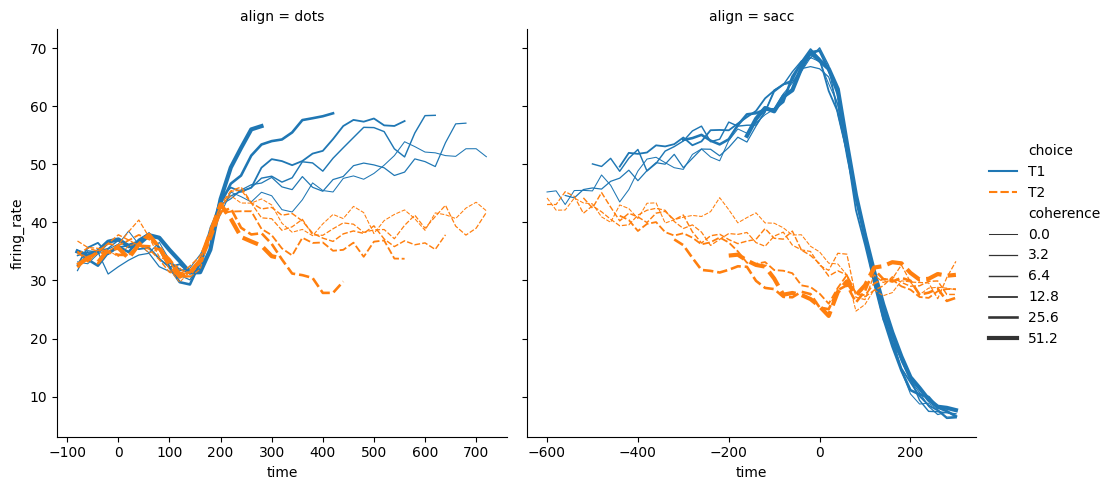

In [5]:
# load an example dataset from the seaborn online repo
dots = seaborn.load_dataset("dots")

# plot
seaborn.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

## Using a Requirements File

In Python projects, using a _requirements_ file is a popular best practice.

This file specifies all the packages and versions of the whole dependency tree that you need in a project.

Inspect the provided requirements file.
This is an example file which contains two example dependencies, `pytest`, a testing framework, and `tomli`, a TOML parser.

In [6]:
!cat requirements.txt

pytest==7.4.3
tomli==2.0.1

The `==` version operator specifies that the installed version must exactly match the given version.

Other operators exist, such as `>`, `>=`, or `~=`.
For the full list, see https://peps.python.org/pep-0440/#version-specifiers

To install all the packages specified in the requirements file, run:

In [7]:
%pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.1/325.1 kB 22.0 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Freezing the Dependency Tree

To ensure that you always work with the same dependency tree, you can freeze your dependency tree into a requirements file.

In [8]:
%pip freeze > requirements_full.txt

Note: you may need to restart the kernel to use updated packages.


In [9]:
!cat requirements_full.txt

absl-py==1.4.0
aiohttp==3.8.5
aiosignal==1.3.1
ansiwrap==0.8.4
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.2.3
astroid==2.15.6
asttokens==2.2.1
async-timeout==4.0.3
attrs==23.1.0
autopep8==2.0.2
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.12.2
black==23.7.0
bleach==6.0.0
bokeh==3.2.2
boto3==1.26.165
botocore==1.29.165
cachetools==5.3.1
certifi==2023.7.22
cffi==1.15.1
charset-normalizer==3.2.0
click==8.1.6
cloudpickle==2.2.1
colorama==0.4.6
comm==0.1.4
contourpy==1.1.0
cryptography==41.0.3
cycler==0.11.0
debugpy==1.6.7.post1
decorator==5.1.1
defusedxml==0.7.1
Deprecated==1.2.14
deprecation==2.1.0
dill==0.3.7
docstring-parser==0.15
docstring-to-markdown==0.12
elyra-code-snippet-extension==3.15.0
elyra-pipeline-editor-extension==3.15.0
elyra-python-editor-extension==3.15.0
elyra-server==3.15.0
entrypoints==0.4
exceptiongroup==1.1.3
executing==1.2.0
fastjsonschema==2.18.0
fire==0.5.0
flake8==6.0.0
fonttools==4.42.0
fqdn==1.5.1
frozenlist==1.4.0
gitdb==4.0.10


You can now use the generated requirements file to ensure that your dependency tree is locked.

In [10]:
%pip install -r requirements_full.txt


[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


> **IMPORTANT**
>
> You might break the workbench if you use a requirements file that has been generated in an external environment, such as your laptop.
> If possible, do not modify the library versions that are preinstalled in the workbench.
> These versions have been tested by Red Hat and provide a stable working environment.
>
> If you need to make major changes to the dependency tree of a workbench, you might want to use your own custom image.
> In this case, you must build a custom notebook image and add this image to RHODS.